# Adult Census Income
Predict whether income exceeds $50K/yr based on census data https://www.kaggle.com/uciml/adult-census-income

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./adult.csv')
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


Прогнозируемая велечина - доход (столбец income).

In [3]:
# посмотрим общую инофрмацию о датафрейме

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [4]:
df.notnull().describe()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,True,True,True,True,True,True,True,True,True,True,True,True,True,True,True
freq,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561


Пропусков в данных нет, есть категориальные признаки (object), их нужно перекодировать

In [5]:
# посмторим уникальные значения признака native.country
set(df['native.country'])

{'?',
 'Cambodia',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(Guam-USVI-etc)',
 'Peru',
 'Philippines',
 'Poland',
 'Portugal',
 'Puerto-Rico',
 'Scotland',
 'South',
 'Taiwan',
 'Thailand',
 'Trinadad&Tobago',
 'United-States',
 'Vietnam',
 'Yugoslavia'}

In [6]:
# видно, что есть ? - неизвестные данные, они нам ничем не помогут, посмотрим, сколько их в датасете
arr = df.values == '?' 
np.count_nonzero(arr == True)

4262

In [7]:
# получается, в худшем случае мы удалим 1/8 датасета, если почистим строки с ?. Сделаем это
df = df.drop(df[df.values == '?'].index)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [8]:
# посмотрим на описательную статистику датафрейма по количественным признакам признакам
df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,30162.000000,3.016200e+04,30162.000000,30162.000000,30162.000000,30162.000000
mean,38.437902,1.897938e+05,10.121312,1092.007858,88.372489,40.931238
std,13.134665,1.056530e+05,2.549995,7406.346497,404.298370,11.979984
min,17.000000,1.376900e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.176272e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.784250e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.376285e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
# закодируем категориальные признаки используя ту же функцию, что и для первого датафрейма
def number_encode_features(data_frame):
    result = data_frame.copy()
    encoders = {} 
    for column in result.columns:
        if result.dtypes[column] == np.object:
            uniqe_vals = set(result[column])
            coder = {word:index for index, word in enumerate(uniqe_vals)}
            encoders[column] = coder
            result[column] = result[column].map(encoders[column])
    return result, encoders

df_encoded, encoders = number_encode_features(df)

In [10]:
df_encoded.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,6,132870,6,9,0,1,1,3,1,0,4356,18,3,0
3,54,6,140359,1,4,6,3,5,3,1,0,3900,40,3,0
4,41,6,264663,11,10,1,4,4,3,1,0,3900,40,3,0
5,34,6,216864,6,9,6,2,5,3,1,0,3770,45,3,0
6,38,6,150601,8,6,1,9,5,3,0,0,3770,40,3,0


In [11]:
encoders

{'workclass': {'Self-emp-inc': 0,
  'Self-emp-not-inc': 1,
  'Without-pay': 2,
  'Federal-gov': 3,
  'Local-gov': 4,
  'State-gov': 5,
  'Private': 6},
 'education': {'Prof-school': 0,
  '7th-8th': 1,
  'Doctorate': 2,
  '9th': 3,
  '1st-4th': 4,
  '12th': 5,
  'HS-grad': 6,
  '5th-6th': 7,
  '10th': 8,
  'Masters': 9,
  'Assoc-acdm': 10,
  'Some-college': 11,
  '11th': 12,
  'Assoc-voc': 13,
  'Preschool': 14,
  'Bachelors': 15},
 'marital.status': {'Widowed': 0,
  'Separated': 1,
  'Married-spouse-absent': 2,
  'Married-civ-spouse': 3,
  'Never-married': 4,
  'Married-AF-spouse': 5,
  'Divorced': 6},
 'occupation': {'Priv-house-serv': 0,
  'Exec-managerial': 1,
  'Other-service': 2,
  'Machine-op-inspct': 3,
  'Prof-specialty': 4,
  'Armed-Forces': 5,
  'Protective-serv': 6,
  'Sales': 7,
  'Craft-repair': 8,
  'Adm-clerical': 9,
  'Handlers-cleaners': 10,
  'Transport-moving': 11,
  'Farming-fishing': 12,
  'Tech-support': 13},
 'relationship': {'Husband': 0,
  'Not-in-family': 1,
 

In [12]:
#посмотрим, какие признаки больше всего влияют на доход по корреляции

df_encoded.corr()['income'].sort_values(ascending=False)

income            1.000000
education.num     0.335286
age               0.241998
hours.per.week    0.229480
capital.gain      0.221196
capital.loss      0.150053
race              0.095498
education         0.094412
fnlwgt           -0.008957
native.country   -0.030706
occupation       -0.127066
workclass        -0.131788
marital.status   -0.178069
sex              -0.216699
relationship     -0.317856
Name: income, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000B54EC44A48>,
      dtype=object)

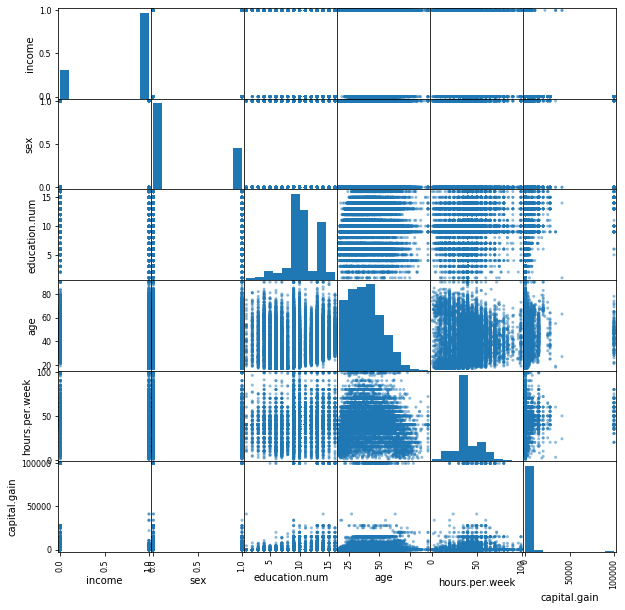

In [15]:
from pandas.plotting import scatter_matrix

at = ['income', 'sex', 'education.num', 'age', 'hours.per.week','capital.gain' ] 
scatter_matrix(df_encoded[at], figsize=(10, 10))

In [13]:
# дропнем income из датафрейма для дальнейшего анализа, сохранив в отдельную серию

Income = df_encoded['income'].copy()
df_encoded = df_encoded.drop(['income'], axis=1)
df_encoded.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
1,82,6,132870,6,9,0,1,1,3,1,0,4356,18,3
3,54,6,140359,1,4,6,3,5,3,1,0,3900,40,3
4,41,6,264663,11,10,1,4,4,3,1,0,3900,40,3
5,34,6,216864,6,9,6,2,5,3,1,0,3770,45,3
6,38,6,150601,8,6,1,9,5,3,0,0,3770,40,3


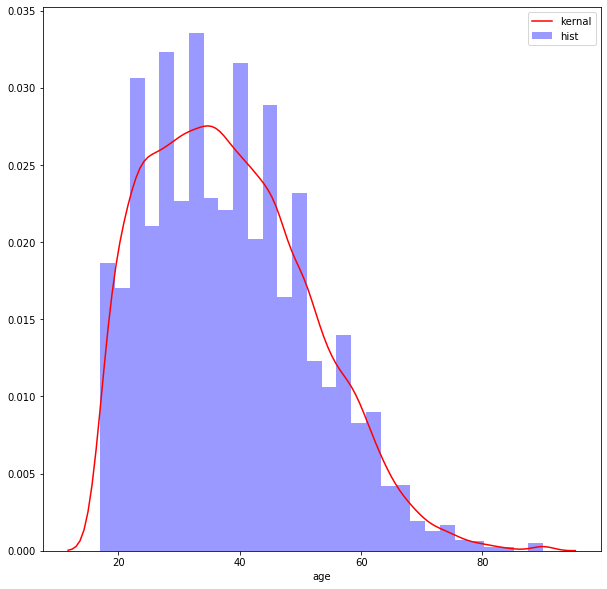

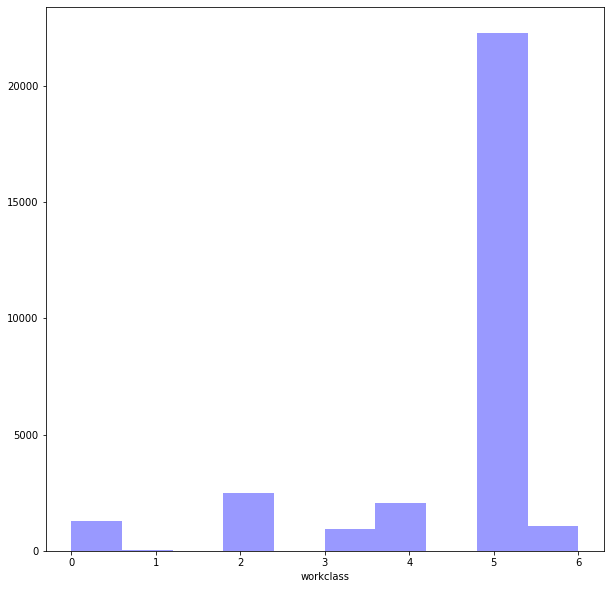

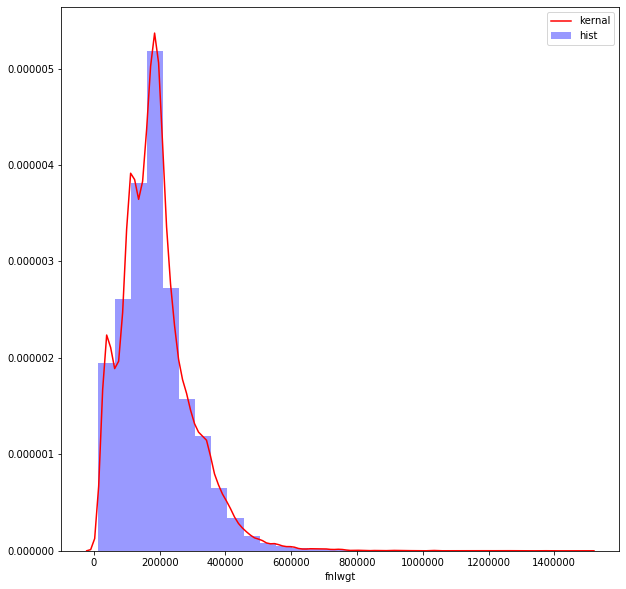

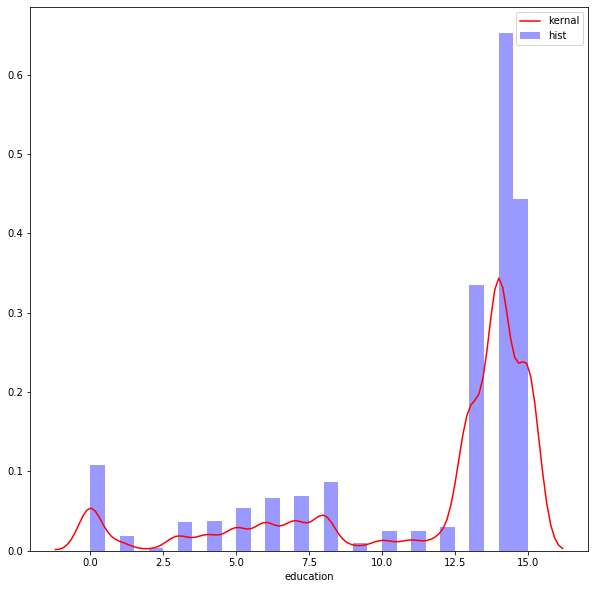

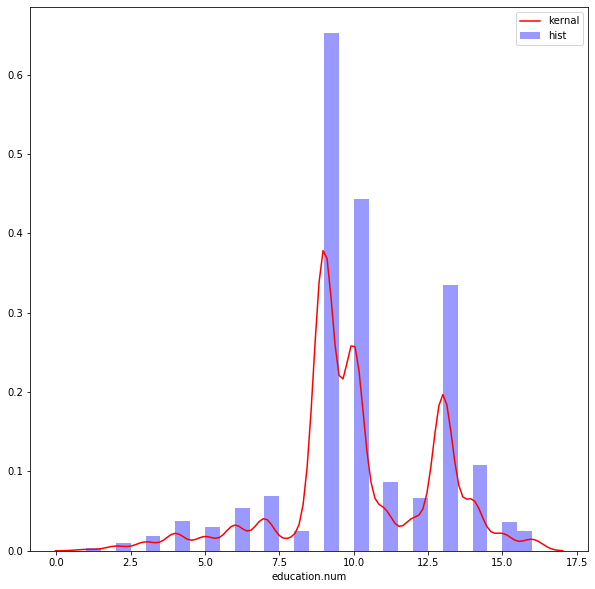

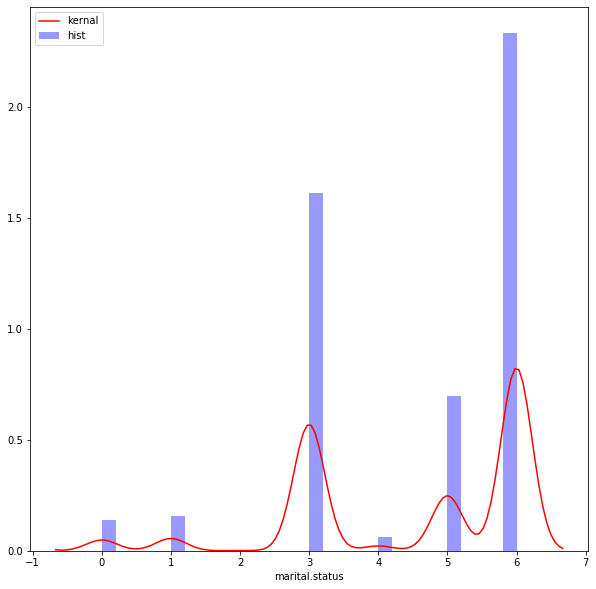

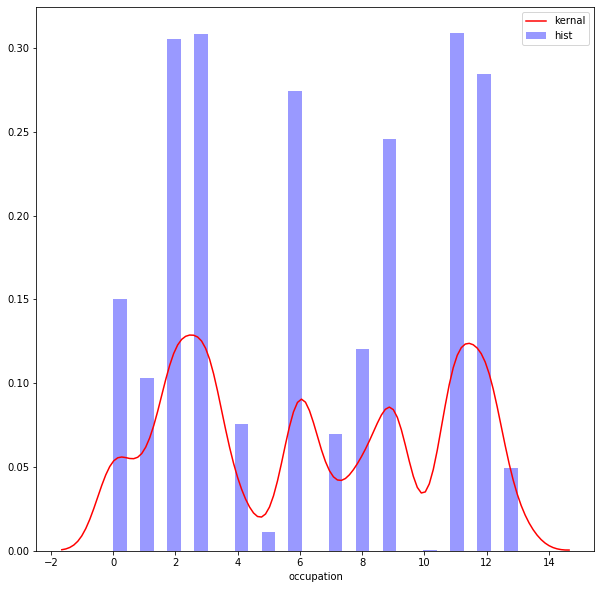

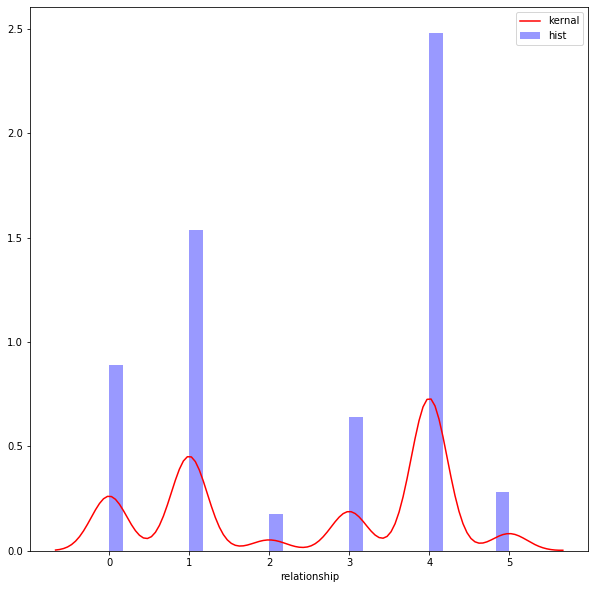

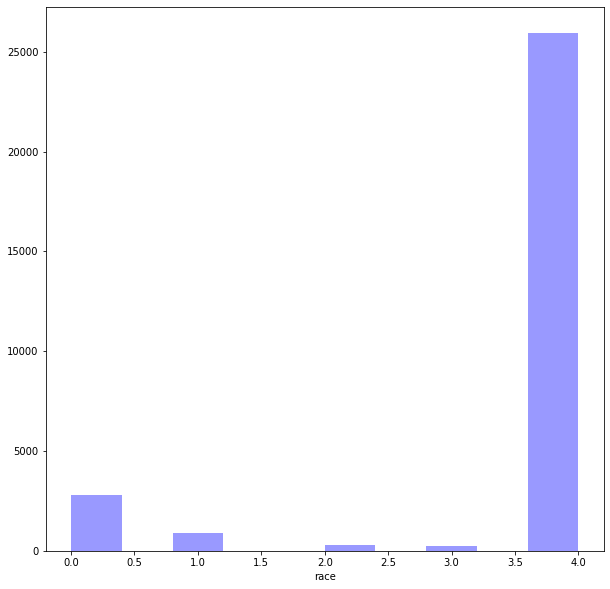

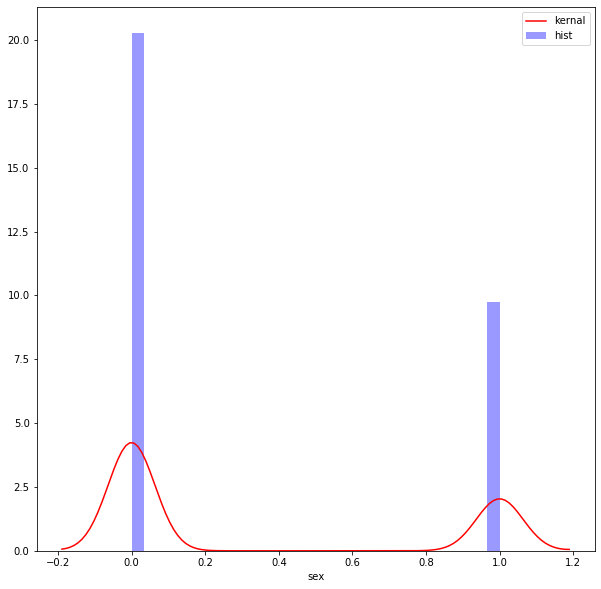

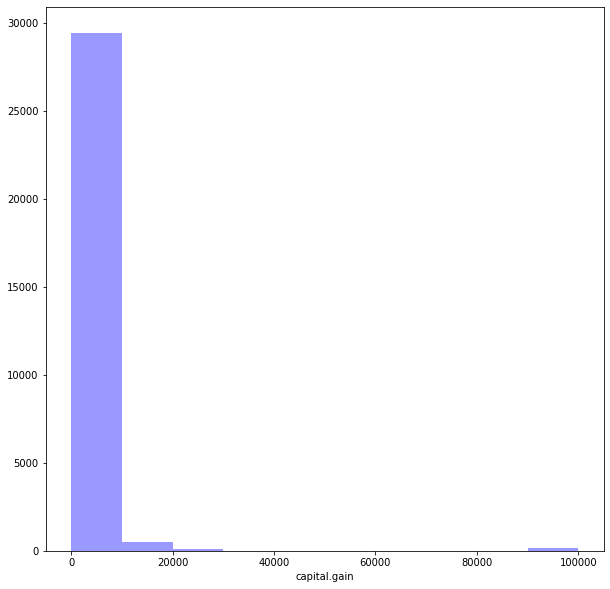

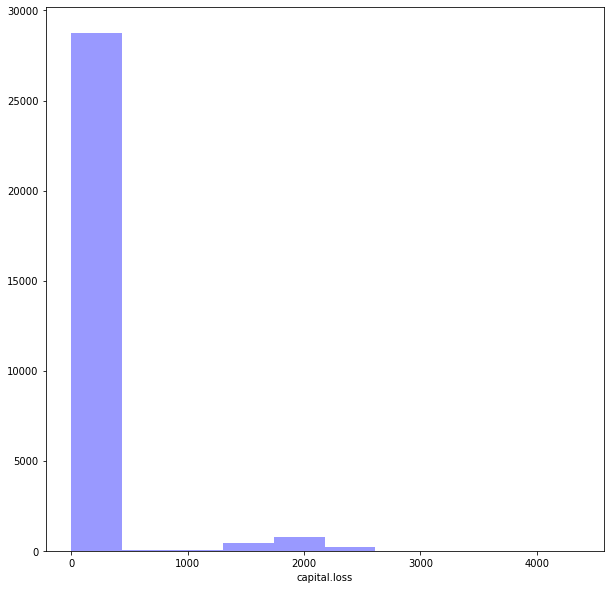

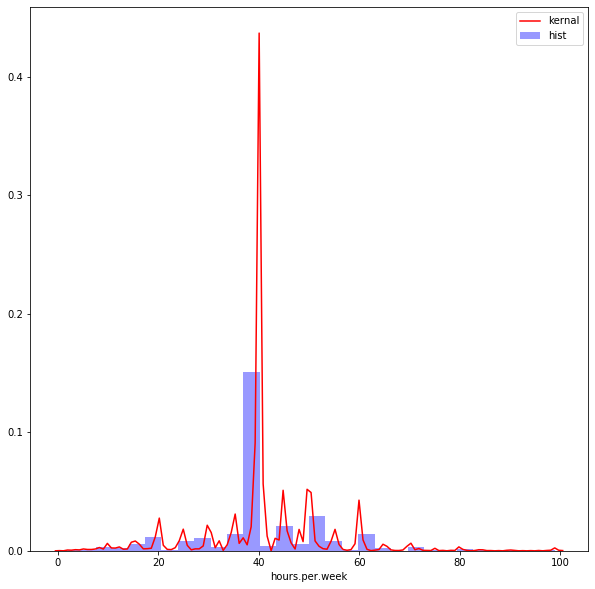

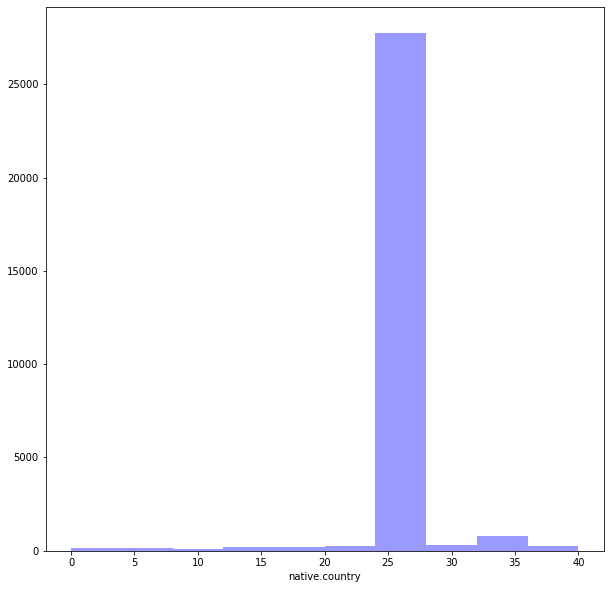

In [17]:
# посмотрим на распределения величин по признакам с помощью гистограмм и kde

l = [i for i in df_encoded.columns]

for i in range(len(l)):
    fig = plt.subplots(figsize=(10, 10))
    if i in [1,8,10,11,13]:
        sns.distplot(df_encoded[l[i]],bins = 10, kde=False,hist_kws={'color':'blue','label':'hist'}) 
    else:
        sns.distplot(df_encoded[l[i]],bins = 30, kde_kws={'color':'red','label':'kernal'}, 
            hist_kws={'color':'blue','label':'hist'})

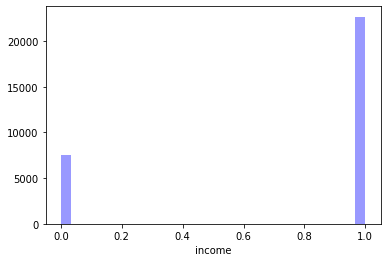

In [18]:
# посмотрим на распределение целевого признака 
sns.distplot(Income,bins = 30,  kde=False,hist_kws={'color':'blue','label':'hist'}) 

In [19]:
# посмтроим матрицу корреляций, выбросим данные с единичной линейной зависимостью

df_encoded.corr()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
age,1.000000,-0.119338,-0.076511,-0.105746,0.043526,0.260722,-0.024472,0.386845,0.020176,-0.081993,0.080154,0.060165,0.101599,-0.014964
workclass,-0.119338,1.000000,0.033346,0.047139,-0.106701,-0.058684,-0.121320,-0.065586,0.009777,0.028274,0.005144,-0.010735,-0.012898,0.012855
fnlwgt,-0.076511,0.033346,1.000000,-0.004041,-0.044992,-0.032046,-0.004975,-0.029049,-0.080526,-0.025362,0.000422,-0.009750,-0.022886,0.061467
education,-0.105746,0.047139,-0.004041,1.000000,-0.084295,-0.046392,-0.044424,-0.061991,-0.018546,0.030810,-0.073773,-0.043456,-0.034096,-0.019875
education.num,0.043526,-0.106701,-0.044992,-0.084295,1.000000,0.096192,0.204081,0.071882,0.051882,-0.006157,0.124416,0.079646,0.152522,-0.145628
marital.status,0.260722,-0.058684,-0.032046,-0.046392,0.096192,1.000000,-0.121336,0.725158,0.123321,-0.369251,0.073979,0.067479,0.240056,-0.011699
occupation,-0.024472,-0.121320,-0.004975,-0.044424,0.204081,-0.121336,1.000000,-0.097078,-0.048792,0.265948,0.011315,-0.005738,-0.105719,-0.038562
relationship,0.386845,-0.065586,-0.029049,-0.061991,0.071882,0.725158,-0.097078,1.000000,0.052791,-0.251652,0.077186,0.070441,0.230676,-0.004944
race,0.020176,0.009777,-0.080526,-0.018546,0.051882,0.123321,-0.048792,0.052791,1.000000,-0.112760,0.018502,0.025606,0.059820,0.144417
sex,-0.081993,0.028274,-0.025362,0.030810,-0.006157,-0.369251,0.265948,-0.251652,-0.112760,1.000000,-0.048814,-0.047011,-0.231268,-0.006074


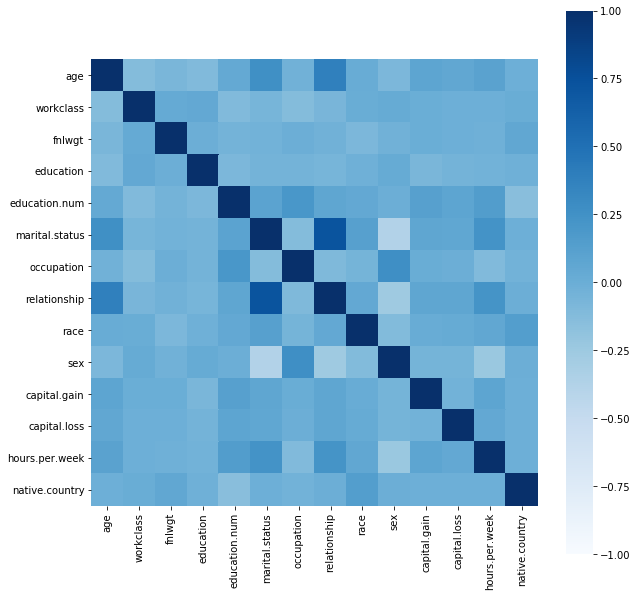

In [20]:
plt.subplots(figsize=(10,10))
sns.heatmap(df_encoded.corr(), vmin=-1, cmap='Blues', square=True)
plt.show()

Таких признаков нет, датасет готов к дальнейшей работе

In [24]:
X = np.array(df_encoded)
y = np.array(Income)

In [22]:
X

array([[    82,      5, 132870, ...,   4356,     18,     26],
       [    54,      5, 140359, ...,   3900,     40,     26],
       [    41,      5, 264663, ...,   3900,     40,     26],
       ...,
       [    40,      5, 154374, ...,      0,     40,     26],
       [    58,      5, 151910, ...,      0,     40,     26],
       [    22,      5, 201490, ...,      0,     20,     26]], dtype=int64)

In [23]:
y

array([1, 1, 1, ..., 0, 1, 1], dtype=int64)

In [15]:
# сделаем train-test split

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.2,
                                                   random_state=42)

# KNN

In [25]:
# реализацмя алгоритма KNN

class KNN:
    def __init__(self, n_neighbours):
        self.n_neighbours = n_neighbours
        
    def fit(self, X, y):
        self.X = X
        self.y = y
        
    def predict(self, X_test):
        y_pred = np.zeros(len(X_test)).astype(np.int8)
        for i in np.arange(len(X_test)):
            y_pred[i] = self.predict_data_point(X_test[i])
        return y_pred
    
    def predict_data_point(self, data_point):
        dist = self.norm(self.X, data_point)
        ordered = np.argsort(dist)
        width = dist[ordered[self.n_neighbours]]
        ordered = ordered[:self.n_neighbours]
        y_k = self.y[ordered]
        W = dist[ordered] / width
        positive = (W * y_k).sum()
        negative = (W * np.logical_not(y_k)).sum()
        return int(positive > negative)
    
    def norm(self, point1, point2):
        return (np.abs(point1 - point2) ** 2).T.sum(axis = 0)**(1.0 / 2)


In [28]:
# функция отрисовки для grid search

def grid_plot(x, y, x_label, title, y_label='cross_val'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

{'n_neighbors': 78} 0.7682165859655188


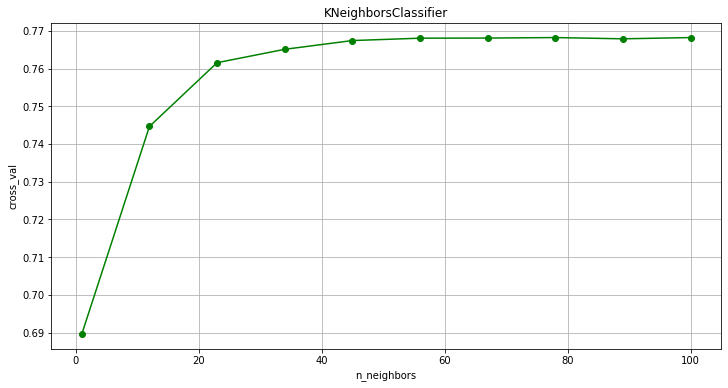

In [31]:
# поиск наилучшего параметра n_neighbors используя кросс-валидацию
from sklearn.model_selection import GridSearchCV

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

grid = {'n_neighbors': np.array(np.linspace(1, 100, 10), dtype='int')}
gs = GridSearchCV(knn, grid, cv=5)
gs.fit(X, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

{'n_neighbors': 71} 0.7682828879711543


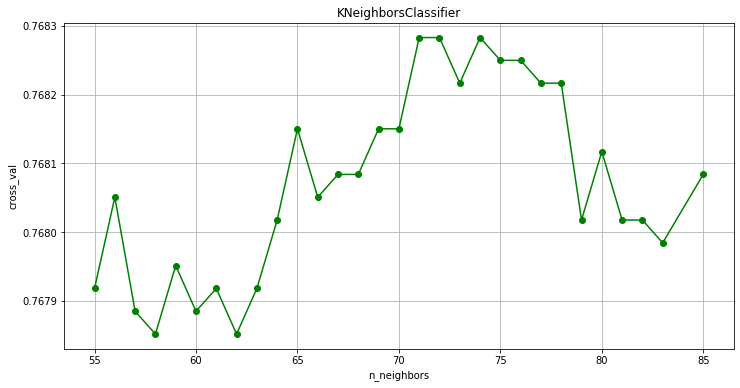

In [32]:
# продолжаем

grid = {'n_neighbors': np.array(np.linspace(55, 85, 30), dtype='int')}
gs = GridSearchCV(knn, grid, cv=5)
gs.fit(X, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

In [34]:
# лучший параметр n_neighbors = 71
# пример реализованного KNN с параметром n_neighbors = 71

from sklearn import metrics

not_sklearn_knn = KNN(n_neighbours= 71)
not_sklearn_knn.fit(X_train, y_train)
y_not_sklearn_knn = not_sklearn_knn.predict(X_test)

print(metrics.classification_report(y_test, y_not_sklearn_knn))


              precision    recall  f1-score   support

           0       0.95      0.11      0.20      1500
           1       0.77      1.00      0.87      4533

    accuracy                           0.78      6033
   macro avg       0.86      0.56      0.54      6033
weighted avg       0.82      0.78      0.70      6033



[[ 170 1330]
 [   9 4524]]


Text(0.5, 42.0, 'Predicted value')

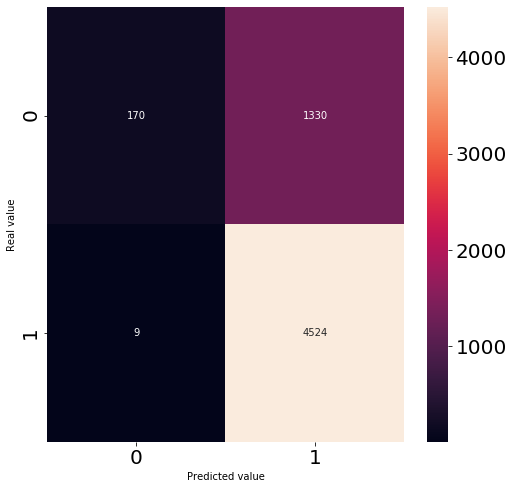

In [35]:
# confusion matrix

import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_not_sklearn_knn)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [36]:
# пример KNN используя sklearn с параметром n_neighbors = 75

knn = KNeighborsClassifier(n_neighbors=75) 
clf_knn = knn.fit(X_train, y_train)
y_knn = clf_knn.predict(X_test)

print(metrics.classification_report(y_test, y_knn))

              precision    recall  f1-score   support

           0       0.97      0.12      0.22      1500
           1       0.77      1.00      0.87      4533

    accuracy                           0.78      6033
   macro avg       0.87      0.56      0.55      6033
weighted avg       0.82      0.78      0.71      6033



[[ 185 1315]
 [   6 4527]]


Text(0.5, 42.0, 'Predicted value')

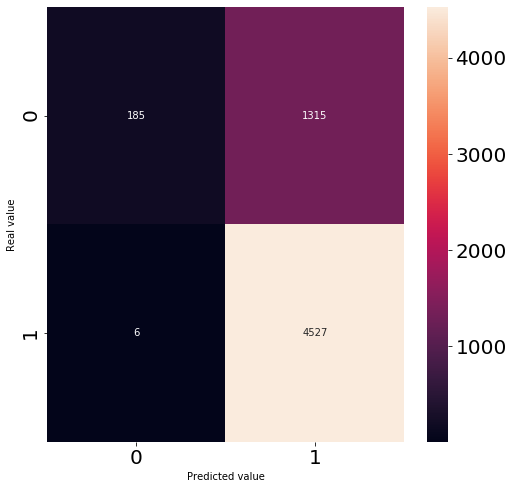

In [37]:
# confusion matrix

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_knn)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Видно, что алгоритм плохо предсказывает один класс, это связано с тем, что данные разбалансированны
Исправить это можно настроив веса для алгоритма или можно исскуссвенно уравнять соотношения классов в выборке

Так же важно отметить, что реализация sklearn работает гораздо быстрее

По метрикам качества алгоритмы почти идентичны, но sklearn алгоритм немного лучше предсказвает один из классов

Много ошибок второго рода (False Positive), что для данной задачи очень плохо, например, мы ошибочно предсказываем, что у человека доход >50к, даём ему кредит, а затем он не может его выплатить.

# Logistic Regression

In [38]:
# реализация алгоритма Logistic Regression

class Logistic_Regression:
    
    def __init__(self, learning_rate, max_iter):
        self.learning_rate = learning_rate
        self.max_iter = max_iter
        
    # функция активации    
    def sigmoid_activation(self,x):
        return 1 / (1 + np.exp(-x))
    
    def net_input(self,x, theta):
        return x @ theta

    def probability(self,x, theta):
        return self.sigmoid_activation(self.net_input(x, theta))

    # градиент для логистической регрессии
    def gradient(self,x,y,theta):
        m = x.shape[0]
        return (1/m) * x.T @ (self.sigmoid_activation(self.net_input(x,theta)) - y)

    # градиентный спуск
    def fit_grad(self,X,y,theta,batch_size):
        G = np.zeros(X.shape[1])
        eps = 0.1**10
        alpha = 0.9
        w = np.copy(theta)
        
        for i in range(self.max_iter):
            ind = np.random.choice(X.shape[0], batch_size)
            X_ind, y_ind = X[ind, :], y[ind]
            g = self.gradient(X_ind,y_ind,w)
            G = alpha * G + (1 - alpha) * g ** 2
            w = w - self.learning_rate * g / (np.sqrt(G + eps))
        return  w
    
    def fit(self, X,y,batch_size = 32):
        X_ = np.c_[np.ones((X.shape[0], 1)), X]
        theta = np.zeros(X_.shape[1])
        theta[-1] = 1
        self.parametrs = self.fit_grad(X_,y,theta,batch_size)

    def predict(self,X):
        X_ = np.c_[np.ones((X.shape[0], 1)), X]
        theta = self.parametrs
        return  self.probability(X_,theta)

    def predict_classes(self,X,probab_threshold = 0.5):
        return (self.predict(X) >= probab_threshold).astype(int)
    

In [49]:
# пример реализованного алгоритма Logistic Regression

not_sklearn_logreg = Logistic_Regression(learning_rate=0.1, max_iter=200)
not_sklearn_logreg.fit(X_train, y_train)
y_not_sklearn_logreg = not_sklearn_logreg.predict_classes(X_test)

print(metrics.classification_report(y_test, y_not_sklearn_logreg))


              precision    recall  f1-score   support

           0       0.57      0.29      0.38      1500
           1       0.80      0.93      0.86      4533

    accuracy                           0.77      6033
   macro avg       0.68      0.61      0.62      6033
weighted avg       0.74      0.77      0.74      6033



D:\conda\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: overflow encountered in exp
  # This is added back by InteractiveShellApp.init_path()


[[ 428 1072]
 [ 325 4208]]


Text(0.5, 42.0, 'Predicted value')

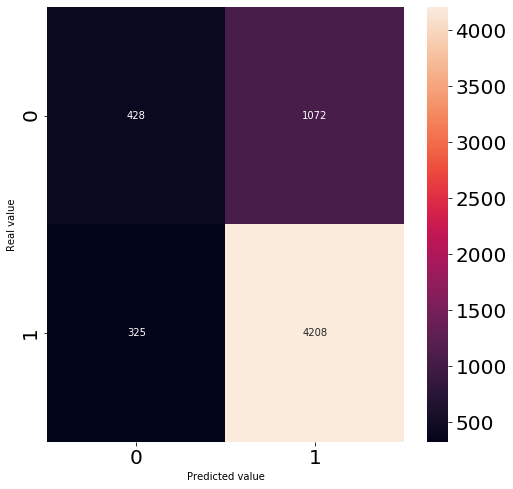

In [50]:
# confusion matrix

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_not_sklearn_logreg)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [44]:
# пример алгоритма Logistic Regression используя sklearn

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(max_iter=200) 
clf_logreg = logreg.fit(X_train, y_train)
y_logreg = clf_logreg.predict(X_test)

print(metrics.classification_report(y_test, y_logreg))

              precision    recall  f1-score   support

           0       0.67      0.29      0.40      1500
           1       0.80      0.95      0.87      4533

    accuracy                           0.79      6033
   macro avg       0.74      0.62      0.64      6033
weighted avg       0.77      0.79      0.75      6033



[[ 431 1069]
 [ 211 4322]]


Text(0.5, 42.0, 'Predicted value')

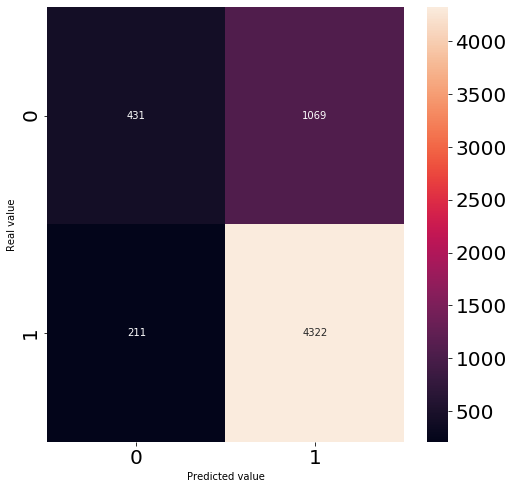

In [45]:
# confusion matrix

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_logreg)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Видно, что ошибок второго рода стало меньше, чем у knn, но больше ошибок первого рода, однако в данной задаче важнее не совершать ошибки второго рода

По метрикам качества практически идентичны

По времени работают примерно одинаково

Осталась та же проблема с предсказанием одного из классов изза разбалансированной выборки



# SVM

In [68]:
# реализация алгоритма SVM

class SVM:
    
    def __init__(self,learning_rate, max_iter, C = 1):
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.C = C
            
    def norm(self, w):
        dist = self.y * (self.X @ w) - 1
        dist[dist > 0] = 0
        return dist

    def get_cost_grads(self, X, w, y):        
        dist = self.norm(w)
        L = 1 / 2 * w @ w - self.C * np.sum(dist)
        ds = -np.sign(dist)
        p = X.T @ (ds * y)
        dw = np.zeros(len(w))
        dw = w - (self.C * p)
        return L, dw / len(X)
    
    def fit_grad(self):
        for i in range(self.max_iter):
            L, dw = self.get_cost_grads(self.X, self.w, self.y)
            self.w = self.w - self.learning_rate * dw

    def fit(self,X,y):
        self.X = np.column_stack((np.ones(len(X)), X))
        self.y = np.copy(y)
        self.y[self.y==0] = -1
        self.w = np.ones(len(self.X[0]))
        self.fit_grad()

    def predict(self, X):
        X = np.column_stack((np.ones(len(X)), X))
        y = np.sign(X @ self.w)
        y[y==-1] = 0
        return y


In [70]:
# пример реализованного алгоритма SVM, C=1

not_sklearn_SVM = SVM(learning_rate=0.01, max_iter=10000)
not_sklearn_SVM.fit(X_train, y_train)
y_not_sklearn_SVM = not_sklearn_SVM.predict(X_test)

print(metrics.classification_report(y_test, y_not_sklearn_SVM))



              precision    recall  f1-score   support

           0       0.90      0.11      0.20      1500
           1       0.77      1.00      0.87      4533

    accuracy                           0.78      6033
   macro avg       0.84      0.55      0.53      6033
weighted avg       0.80      0.78      0.70      6033



[[ 166 1334]
 [  18 4515]]


Text(0.5, 42.0, 'Predicted value')

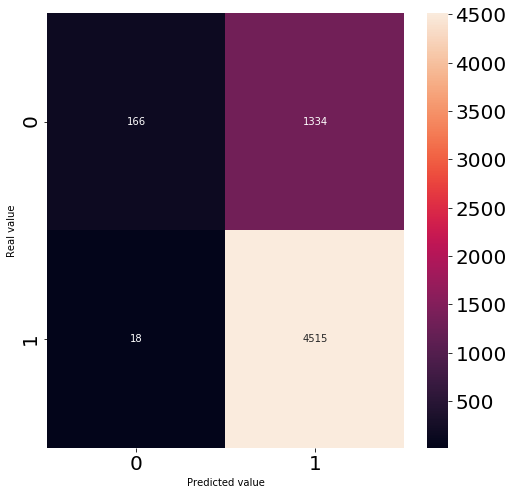

In [71]:
# confusion matrix

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_not_sklearn_SVM)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

In [66]:
# пример алгоритма SVM используя sklearn C = 1

from sklearn.svm import SVC

_SVM = SVC() 
clf_SVM = _SVM.fit(X_train, y_train)
y_SVM = clf_SVM.predict(X_test)

print(metrics.classification_report(y_test, y_SVM))


              precision    recall  f1-score   support

           0       0.98      0.14      0.25      1500
           1       0.78      1.00      0.88      4533

    accuracy                           0.79      6033
   macro avg       0.88      0.57      0.56      6033
weighted avg       0.83      0.79      0.72      6033



[[ 211 1289]
 [   4 4529]]


Text(0.5, 42.0, 'Predicted value')

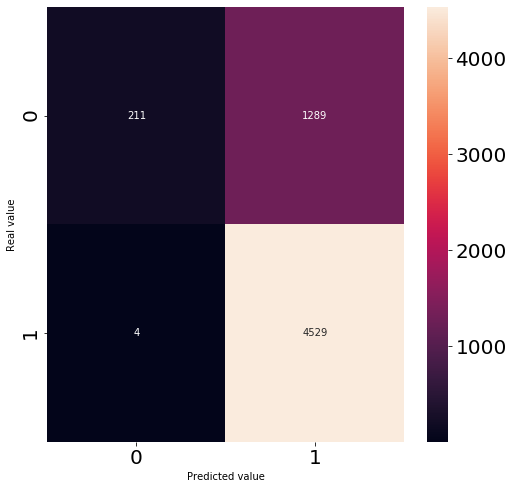

In [72]:
# confusion matrix

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test, y_SVM)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Больше ошибок второго рода, чем у Логистической регресии, но меньше, чем у knn.

Можно попробовать поменять параметр регуляризации C и подобрать лучший (default=1.0)

По времени примерно одинаково

Алгоритм из sklearn соврешает меньше ошибок второго рода, чем реализованный, по метрикам качество лучше


{'C': 1} 0.7771010547206985


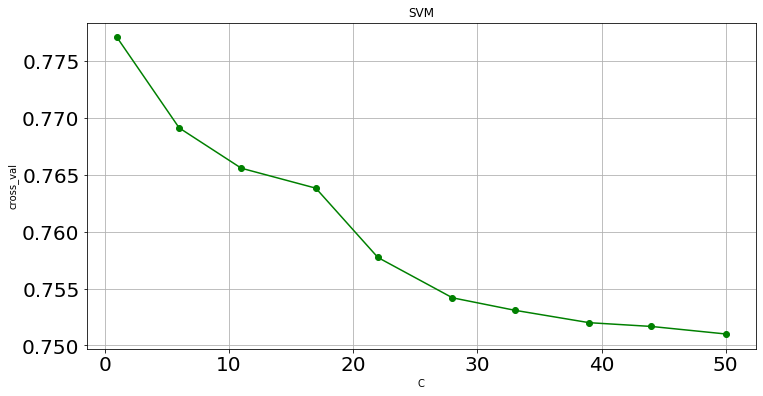

In [74]:
# поиск наилучшего параметра С
__SVM = SVC()

grid = {'C': np.array(np.linspace(1, 50, 10), dtype='int')}
gs = GridSearchCV(__SVM, grid, cv=5)
gs.fit(X, y)

print(gs.best_params_, gs.best_score_)

grid_plot(grid['C'], gs.cv_results_['mean_test_score'], 'C', 'SVM')

Получился C=1 - наилучший параметр регуляризации

# Decision Tree

In [16]:
# реализация алгоритма Decision Tree

class Decision_Tree:
    def __init__(self, max_depth=7,min_size=3):
        self.max_depth = max_depth
        self.min_size = min_size

    def fit(self,X,y):
        dataset = np.column_stack([X,y])
        self.tree = self.__build_tree(dataset)

    def predict(self,X):
        if len(X.shape) == 1:
            return  self.__predict_one(self.tree,X)
        else:
            y_pred = []
            for x in X:
                y_pred.append(self.__predict_one(self.tree,x))
            return y_pred

    def print_tree(self, node, depth=0):
        if isinstance(node, dict):
            print('%s[X%d < %.3f]' % ((depth * ' ', (node['index'] + 1), node['value'])))
            self.print_tree(node['left'], depth + 1)
            self.print_tree(node['right'], depth + 1)
        else:
            print('%s[%s]' % ((depth * ' ', node)))

    def __gini_index(self,groups,classes):
        n_instanse = float(sum([ len(group) for group in groups ]))
        gini = 0.0
        for group in groups:
            size = float(len(group))
            if size == 0:
                continue
            score = 0.0
            for class_val in classes:
                p = [row[-1] for row in group].count(class_val)/size
                score +=p*p
            gini +=(1.0 - score)*(size/n_instanse)
        return  gini

    def __test_split(self,index, value, dataset):
        left, rigth = [],[]
        for row in dataset:
            if row[index]<value:
                left.append(row)
            else:
                rigth.append(row)
        return left, rigth

    def __get_split(self,dataset):
        class_values = list(set(row[-1] for row in dataset))
        b_index, b_value, b_score, b_groups = 999, 999, 999, None

        for index in range(len(dataset[0]) - 1):
            for row in dataset:
                groups = self.__test_split(index,row[index],dataset)
                gini = self.__gini_index(groups,class_values)
                if gini < b_score:
                    b_index, b_value, b_score, b_groups = index, row[index], gini, groups
        return  {'index':b_index,'value':b_value,'groups':b_groups}

    def __to_terminal(self,group):
        outcomes = [row[-1] for row in group]
        return  max(set(outcomes), key=outcomes.count)

    def __split(self,node,depth):
        max_depth,min_size, = self.max_depth, self.min_size

        left, right = node['groups']
        del(node['groups'])
        if not left or not  right:
            node['left'] = node['right'] = self.__to_terminal(left+right)
            return
        if depth >= max_depth:
            node['left'], node['right'] = self.__to_terminal(left), self.__to_terminal(right)
            return

        if len(left) <= min_size:
            node['left'] =self.__to_terminal(left)
        else:
            node['left'] = self.__get_split(left)
            self.__split(node['left'], depth + 1)

        if len(right) <= min_size:
            node['right'] = self.__to_terminal(right)
        else:
            node['right'] = self.__get_split(right)
            self.__split(node['right'], depth + 1)

    def __build_tree(self,train):
        root = self.__get_split(train)
        self.__split(root,1)
        return  root


    def __predict_one(self,node,row):
        if row[node['index']] < node['value']:
            if isinstance(node['left'], dict):
                return self.__predict_one(node['left'], row)
            else:
                return node['left']
        else:
            if isinstance(node['right'], dict):
                return self.__predict_one(node['right'], row)
            else:
                return node['right']


In [26]:
X1 = X[:1000]
y1 = y[0:1000]

In [27]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1,
                                                   y1,
                                                   test_size=0.2,
                                                   random_state=42)


In [29]:
# пример реализованного алгоритма Decision Tree
from sklearn import metrics

not_sklearn_DT = Decision_Tree()
not_sklearn_DT.fit(X_train1, y_train1)
y_not_sklearn_DT= not_sklearn_DT.predict(X_test1)

print(metrics.classification_report(y_test1, y_not_sklearn_DT))


              precision    recall  f1-score   support

           0       0.92      0.91      0.92        66
           1       0.96      0.96      0.96       134

    accuracy                           0.94       200
   macro avg       0.94      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



In [30]:
# пример sklearn алгоритма Decision Tree

from sklearn import tree

DT = tree.DecisionTreeClassifier()
clf_DT = DT.fit(X_train, y_train)
y_DT = clf_DT.predict(X_test)

print(metrics.classification_report(y_test, y_DT))

              precision    recall  f1-score   support

           0       0.88      0.86      0.87      4533
           1       0.59      0.64      0.62      1500

    accuracy                           0.80      6033
   macro avg       0.74      0.75      0.74      6033
weighted avg       0.81      0.80      0.80      6033



[[3877  656]
 [ 541  959]]


Text(0.5, 42.0, 'Predicted value')

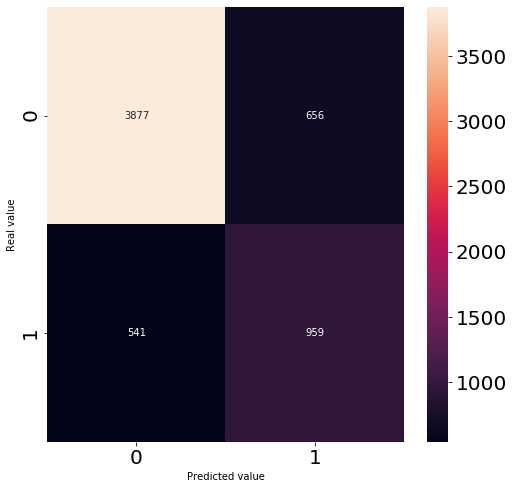

In [32]:
# confusion matrix
import matplotlib

fig = plt.figure(figsize=(8,8))
nn_mtx = metrics.confusion_matrix(y_test,y_DT)
print(nn_mtx)
font = {'weight' : 'bold', 'size'   :22}
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20) 
sns.heatmap(nn_mtx, annot=True, fmt="d")
plt.ylabel("Real value")
plt.xlabel("Predicted value")

Реализованный алгоритм Decision Tree на всей выборке работал очень долго, после часа обучения я решил обрезать выборку, чтобы продемонстрировать его работу

Сравнивать его с реализацией sklearn неккоректно в данном случае.

Однако, если сравнивать с дургими алгоритмами, то Decision Tree сработал лучше всех. У него значительно меньше ошибок второго рода, что для решаемой задачи наиболее важно

Так же на него не повлияла разбалансированность выборки, он хорошо предсказвает оба класса.
